# Finding eigenvalues of matrices with neural networks. 

Script for finding the eigenvectors corresponding to the largest eigenvalue of a matrix with a neural network.

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()
# tf.set_random_seed(343)

# import tensorflow as tf
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
#from lib import compute_dx_dt

matrix_size = 6

A = np.random.random_sample(size=(matrix_size,matrix_size))
A = (A.T + A)/2.0
start_matrix = A

eigen_vals, eigen_vecs =  np.linalg.eig(A)

A = tf.convert_to_tensor(A)
print("A = ", A)

x_0 = tf.convert_to_tensor(np.random.random_sample(size = (1,matrix_size)))
print("x0 = ", x_0)

## The construction phase

num_iter = 100000
num_hidden_neurons = [50]
num_hidden_layers = np.size(num_hidden_neurons)


with tf.variable_scope('dnn'):

    previous_layer = x_0

    for l in range(num_hidden_layers):
        current_layer = tf.layers.dense(previous_layer, num_hidden_neurons[l],activation=tf.nn.sigmoid)
        previous_layer = current_layer

    dnn_output = tf.layers.dense(previous_layer, matrix_size)

with tf.name_scope('loss'):
    print("dnn_output = ", dnn_output)
    
    x_trial = tf.transpose(dnn_output)
    print("x_trial = ", x_trial)
    
    temp1 = (tf.tensordot(tf.transpose(x_trial), x_trial, axes=1)*A)
    temp2 = (1- tf.tensordot(tf.transpose(x_trial), tf.tensordot(A, x_trial, axes=1), axes=1))*np.eye(matrix_size)
    func = tf.tensordot((temp1-temp2), x_trial, axes=1)
    
    print(temp1)
    print(temp2)
    print(func)
    
    func = tf.transpose(func)
    x_trial = tf.transpose(x_trial)
    
    loss = tf.losses.mean_squared_error(func, x_trial)

learning_rate = 0.001

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    traning_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

g_dnn = None

losses = []

with tf.Session() as sess:
    init.run()
    for i in range(num_iter):
        sess.run(traning_op)

        if i % 100 == 0:
            l = loss.eval()
            print("Step:", i, "/",num_iter, "loss: ", l)
            losses.append(l)

    x_dnn = x_trial.eval()
x_dnn = x_dnn.T

A =  Tensor("Const:0", shape=(6, 6), dtype=float64)
x0 =  Tensor("Const_1:0", shape=(1, 6), dtype=float64)
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
dnn_output =  Tensor("dnn/dense_1/BiasAdd:0", shape=(1, 6), dtype=float64)
x_trial =  Tensor("loss/transpose:0", shape=(6, 1), dtype=float64)
Tensor("loss/mul:0", shape=(6, 6), dtype=float64)
Tensor("loss/mul_1:0", shape=(6, 6), dtype=float64)
Tensor("loss/Tensordot_3:0", shape=(6, 1), dtype=float64)
Step: 0 / 100000 loss:  2.0191553
Step: 100 / 100000 loss:  0.022660406
Step: 200 / 100000 loss:  0.006862058
Step: 300 / 100000 loss:  0.0028367888
Step: 400 / 100000 loss:  0.001317931
Step: 500 / 100000 loss:  0.00064829254
Step: 600 / 100000 loss:  0.0003291912
Step: 700 / 100000 loss:  0.00017035629
Step: 800 / 100000 loss:  8.9204266e-05
Step: 900 / 100000 loss:  4.706214e-05
Step: 1000 / 100000 loss:  2.4949668e-05
Step: 1100 / 100000 loss:  1.326892

Step: 21700 / 100000 loss:  0.0
Step: 21800 / 100000 loss:  0.0
Step: 21900 / 100000 loss:  0.0
Step: 22000 / 100000 loss:  0.0
Step: 22100 / 100000 loss:  0.0
Step: 22200 / 100000 loss:  0.0
Step: 22300 / 100000 loss:  0.0
Step: 22400 / 100000 loss:  0.0
Step: 22500 / 100000 loss:  0.0
Step: 22600 / 100000 loss:  0.0
Step: 22700 / 100000 loss:  0.0
Step: 22800 / 100000 loss:  0.0
Step: 22900 / 100000 loss:  0.0
Step: 23000 / 100000 loss:  0.0
Step: 23100 / 100000 loss:  0.0
Step: 23200 / 100000 loss:  0.0
Step: 23300 / 100000 loss:  0.0
Step: 23400 / 100000 loss:  0.0
Step: 23500 / 100000 loss:  0.0
Step: 23600 / 100000 loss:  0.0
Step: 23700 / 100000 loss:  0.0
Step: 23800 / 100000 loss:  0.0
Step: 23900 / 100000 loss:  0.0
Step: 24000 / 100000 loss:  0.0
Step: 24100 / 100000 loss:  0.0
Step: 24200 / 100000 loss:  0.0
Step: 24300 / 100000 loss:  0.0
Step: 24400 / 100000 loss:  0.0
Step: 24500 / 100000 loss:  0.0
Step: 24600 / 100000 loss:  0.0
Step: 24700 / 100000 loss:  0.0
Step: 24

Step: 47500 / 100000 loss:  0.0
Step: 47600 / 100000 loss:  0.0
Step: 47700 / 100000 loss:  0.0
Step: 47800 / 100000 loss:  0.0
Step: 47900 / 100000 loss:  0.0
Step: 48000 / 100000 loss:  0.0
Step: 48100 / 100000 loss:  0.0
Step: 48200 / 100000 loss:  0.0
Step: 48300 / 100000 loss:  0.0
Step: 48400 / 100000 loss:  0.0
Step: 48500 / 100000 loss:  0.0
Step: 48600 / 100000 loss:  0.0
Step: 48700 / 100000 loss:  0.0
Step: 48800 / 100000 loss:  0.0
Step: 48900 / 100000 loss:  0.0
Step: 49000 / 100000 loss:  0.0
Step: 49100 / 100000 loss:  0.0
Step: 49200 / 100000 loss:  0.0
Step: 49300 / 100000 loss:  0.0
Step: 49400 / 100000 loss:  0.0
Step: 49500 / 100000 loss:  0.0
Step: 49600 / 100000 loss:  0.0
Step: 49700 / 100000 loss:  0.0
Step: 49800 / 100000 loss:  0.0
Step: 49900 / 100000 loss:  0.0
Step: 50000 / 100000 loss:  0.0
Step: 50100 / 100000 loss:  0.0
Step: 50200 / 100000 loss:  0.0
Step: 50300 / 100000 loss:  0.0
Step: 50400 / 100000 loss:  0.0
Step: 50500 / 100000 loss:  0.0
Step: 50

Step: 73400 / 100000 loss:  0.0
Step: 73500 / 100000 loss:  0.0
Step: 73600 / 100000 loss:  0.0
Step: 73700 / 100000 loss:  0.0
Step: 73800 / 100000 loss:  0.0
Step: 73900 / 100000 loss:  0.0
Step: 74000 / 100000 loss:  0.0
Step: 74100 / 100000 loss:  0.0
Step: 74200 / 100000 loss:  0.0
Step: 74300 / 100000 loss:  0.0
Step: 74400 / 100000 loss:  0.0
Step: 74500 / 100000 loss:  0.0
Step: 74600 / 100000 loss:  0.0
Step: 74700 / 100000 loss:  0.0
Step: 74800 / 100000 loss:  0.0
Step: 74900 / 100000 loss:  0.0
Step: 75000 / 100000 loss:  0.0
Step: 75100 / 100000 loss:  0.0
Step: 75200 / 100000 loss:  0.0
Step: 75300 / 100000 loss:  0.0
Step: 75400 / 100000 loss:  0.0
Step: 75500 / 100000 loss:  0.0
Step: 75600 / 100000 loss:  0.0
Step: 75700 / 100000 loss:  0.0
Step: 75800 / 100000 loss:  0.0
Step: 75900 / 100000 loss:  0.0
Step: 76000 / 100000 loss:  0.0
Step: 76100 / 100000 loss:  0.0
Step: 76200 / 100000 loss:  0.0
Step: 76300 / 100000 loss:  0.0
Step: 76400 / 100000 loss:  0.0
Step: 76

Step: 99600 / 100000 loss:  0.0
Step: 99700 / 100000 loss:  0.0
Step: 99800 / 100000 loss:  0.0
Step: 99900 / 100000 loss:  0.0


## Plotting loss over time

Text(0, 0.5, 'Loss')

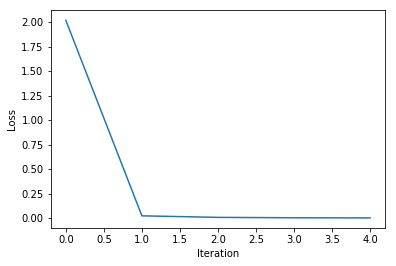

In [4]:
plt.plot(losses[:5])
plt.xlabel("Iteration")
plt.ylabel("Loss")

## Printing eigenvector and eigenvalues

In [5]:
print("Eigenvector NN = \n", (x_dnn/(x_dnn**2).sum()**0.5), "\n")

eigen_val_nn = x_dnn.T @ (start_matrix @ x_dnn) / (x_dnn.T @ x_dnn)

print("Eigenvalue NN = \n", eigen_val_nn, "\n \n")
print("Eigenvector analytic = \n", eigen_vecs)
print("\n")
print("Eigenvalues analytic = \n",eigen_vals)


Eigenvector NN = 
 [[0.39102385]
 [0.41813081]
 [0.4112727 ]
 [0.42373881]
 [0.31962169]
 [0.47054133]] 

Eigenvalue NN = 
 [[3.32927854]] 
 

Eigenvector analytic = 
 [[ 0.39102384  0.37327188  0.68249482  0.19314131  0.43158254 -0.13565482]
 [ 0.41813082 -0.21544287  0.0517078  -0.85524846  0.04349033 -0.20672676]
 [ 0.4112727  -0.78668253  0.1648857   0.34671246 -0.02876616  0.25250949]
 [ 0.42373881  0.32112534  0.09676804  0.07916383 -0.83656144  0.04310365]
 [ 0.31962169 -0.03283447 -0.4622512   0.32363834  0.08752416 -0.75543726]
 [ 0.47054132  0.30196602 -0.53037685  0.00531919  0.32174849  0.55005219]]


Eigenvalues analytic = 
 [ 3.32927854 -0.93859    -0.71386523  0.60372286  0.19411317 -0.14395577]
